# 🌎 U.S. Workplace Injury Analysis 🌎

# -- (Part 1 of 2) --

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-overview" data-toc-modified-id="Project-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project overview</a></span></li><li><span><a href="#Data-source" data-toc-modified-id="Data-source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data source</a></span><ul class="toc-item"><li><span><a href="#Explanatory-Notes-from-OSHA-Data" data-toc-modified-id="Explanatory-Notes-from-OSHA-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explanatory Notes from OSHA Data</a></span></li><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Dictionary</a></span></li></ul></li><li><span><a href="#Import-required-libraries" data-toc-modified-id="Import-required-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import required libraries</a></span></li><li><span><a href="#Import-Raw-data" data-toc-modified-id="Import-Raw-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import Raw data</a></span></li><li><span><a href="#Understanding-the-Raw-data" data-toc-modified-id="Understanding-the-Raw-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Understanding the Raw data</a></span></li><li><span><a href="#Additional-data-import" data-toc-modified-id="Additional-data-import-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Additional data import</a></span></li><li><span><a href="#Data-Cleaning-&amp;-Formatting" data-toc-modified-id="Data-Cleaning-&amp;-Formatting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Cleaning &amp; Formatting</a></span></li><li><span><a href="#Calculating-Incident-Rate" data-toc-modified-id="Calculating-Incident-Rate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Calculating Incident Rate</a></span></li><li><span><a href="#Clean-Data-Result" data-toc-modified-id="Clean-Data-Result-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Clean Data Result</a></span></li></ul></div>

## Project overview

Within this project we will analyze data of work-related injuries and illnesses from different employers in United States, including both Government (Local and State) and non-Government.

The objective is to explore the officially reported data from OSHA (Occupational Safety and Health Administration) to have insights that can serve to spread awareness and contribute to improve workplace health & safety, and eventually save people lives.

Companies may also take these insights into consideration to see relative level of injuries and illnesses among different industries, firms, or operations within a single firm; which can help them to understand why employees are suffering from injuries/accidents (which sometimes cause fatalities), and eventually will help to determine both problem areas and progress in preventing work-related injuries and illnesses.

## Data source

Source data is being extracted from **OSHA (Occupational Safety and Health Administration)**, which is the federal agency of the United States, part of the United States Department of Labor, that regulates workplace safety and health.

Source: [OSHA Establishment Specific Injury and Illness Data](https://www.osha.gov/Establishment-Specific-Injury-and-Illness-Data)

### Explanatory Notes from OSHA Data

OSHA collects work-related injury and illness data from employers within specific industry and employment size specifications.

Recording or reporting a work-related injury, illness, or fatality does not mean that the employer or employee was at fault, that an OSHA rule has been violated, or that the employee is eligible for workers' compensation or other benefits.

- **Scope of the data**: OSHA only collects data from a portion of all private sector establishments in the United States. Therefore, this data is not representative of all businesses and general conclusions pertaining to all U.S. business should not be drawn.

- **Data quality**: While OSHA takes multiple steps to ensure the data collected is accurate, problems and errors invariably exist for a small percentage of establishments. OSHA does not believe the data for the establishments with the highest rates in these files are accurate in absolute terms. Efforts are made during the collection cycle to correct submission errors; however, some remain **unresolved**. It would be a mistake to say establishments with the highest rates in these files are the "most dangerous" or "worst" establishments in the nation.

- **Rate Calculation**: An incidence rate of injuries and illnesses is computed from the following formula: 
    
    **TCR** = (Number of injuries and illnesses x 200,000) / Employee hours worked 
    
    TCR includes all cases recorded on the OSHA Form 300 (Column H + Column I + Column J).

    **DART** = (Number of injuries and illnesses with days away from work, job transfer, or restriction x 200,000) / Employee hours worked 
    
    DART includes all cases recorded on the OSHA Form 300 (Column H + Column I).

    The 200,000 hours in the formula represents the equivalent of 100 employees working 40 hours per week, 50 weeks per year, and provides the standard base for the incidence rates).
    
    Hours worked should not include any nonwork time, even though paid, such as vacation, sick leave, holidays, etc.    
    
    Visit the [Bureau of Labor Statistics](https://www.bls.gov/iif/osheval.htm) for more information on injury and illness incidence rates.

### Data Dictionary

👉 Click here to see the meaning of each column data: **[Data Dictionary](https://www.osha.gov/sites/default/files/ITA_Data_Dictionary.pdf)**

## Import required libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import pickle

# Functions
import src
%reload_ext autoreload
%autoreload 2

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Import Raw data

Using Web Scrapping tecnique, we will extract the data from OSHA website through Web Scrapping for all recorded years (2016-2021), which will be then processed as a dataframe in Python with Pandas.


In [2]:
# Importing raw data
#src.import_data()

# Getting dataframe
osha_df_raw = src.combine_csv()

data\ITA Data CY 2016.csv
data\ITA Data CY 2017.csv
data\ITA Data CY 2018.csv
data\ITA Data CY 2019.csv
data\ITA Data CY 2020.csv
data\ITA Data CY 2021 submitted thru 3-14-2022 v4.csv


## Understanding the Raw data

In [3]:
# Checking number of rows and columns
print('Original Dataframe size: Number of rows = {0}; Number of Columns = {1}'.format(osha_df_raw.shape[0], osha_df_raw.shape[1]))

# Adjusting Pandas display options to see all columns
pd.options.display.max_columns = osha_df_raw.shape[1]

# Visualize first 5 rows and all columns
osha_df_raw.head()

Original Dataframe size: Number of rows = 1636404; Number of Columns = 33


,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
0,4.0,"McKamish, Inc.","McKamish, Inc.",NaN,50 55th Street,Pittsburgh,PA,15201.0,238220.0,"Heating, ventilation and air-conditioning (HVA...",280.0,579688.0,1.0,0.0,1.0,1.0,4.0,35.0,30.0,6.0,0.0,0.0,0.0,0.0,0.0,41920.0,1.0,3.0,2016.0,8/1/2017 6:12:00,NaN,data\ITA Data CY 2016.csv,NaN
1,5.0,"The Talaria Company, LLC",The Hinckley Company,NaN,40 Industrial Way,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,246.0,501578.0,1.0,0.0,2.0,6.0,5.0,93.0,143.0,13.0,0.0,0.0,0.0,0.0,0.0,41922.0,1.0,3.0,2016.0,8/1/2017 6:23:00,NaN,data\ITA Data CY 2016.csv,NaN
2,6.0,Williamsburg Manufacturing,Williamsburg Manufacturing,NaN,408 Maplewood Ave,Williamsburg,IA,52361.0,336370.0,Motor vehicle metal parts stamping,273.0,619945.0,1.0,0.0,5.0,13.0,0.0,203.0,1017.0,18.0,0.0,0.0,0.0,0.0,0.0,41923.0,1.0,3.0,2016.0,8/1/2017 6:27:00,NaN,data\ITA Data CY 2016.csv,NaN
3,7.0,"The Talaria Company, LLC","Morris Yachts, LLC",NaN,27 Ramp Road,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,33.0,75794.0,1.0,0.0,0.0,1.0,0.0,0.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,41925.0,1.0,2.0,2016.0,8/1/2017 6:36:00,Hit wrong hyperlink,data\ITA Data CY 2016.csv,NaN
4,8.0,"The Talaria Company, LLC","Hunt Yachts, LLC",NaN,1909 Alden Landing,Portsmouth,RI,2871.0,336612.0,Pleasure boats manufacturing,43.0,114734.0,1.0,0.0,3.0,0.0,3.0,92.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,41926.0,1.0,2.0,2016.0,8/1/2017 6:35:00,NaN,data\ITA Data CY 2016.csv,NaN


In [4]:
# Checking dataframe info 
osha_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636404 entries, 0 to 1636403
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1636404 non-null  float64
 1   company_name                  1497475 non-null  object 
 2   establishment_name            1636393 non-null  object 
 3   ein                           761550 non-null   float64
 4   street_address                1636380 non-null  object 
 5   city                          1636372 non-null  object 
 6   state                         1636404 non-null  object 
 7   zip_code                      1636403 non-null  float64
 8   naics_code                    1636404 non-null  float64
 9   industry_description          1519073 non-null  object 
 10  annual_average_employees      1636404 non-null  float64
 11  total_hours_worked            1636392 non-null  float64
 12  no_injuries_illnesses       

In [5]:
# Checking null values per column
osha_df_raw.isnull().sum()

id                                    0
company_name                     138929
establishment_name                   11
ein                              874854
street_address                       24
city                                 32
state                                 0
zip_code                              1
naics_code                            0
industry_description             117331
annual_average_employees              0
total_hours_worked                   12
no_injuries_illnesses                 2
total_deaths                          0
total_dafw_cases                      0
total_djtr_cases                      0
total_other_cases                     0
total_dafw_days                       0
total_djtr_days                       0
total_injuries                        0
total_poisonings                      0
total_respiratory_conditions          0
total_skin_disorders                  0
total_hearing_loss                    0
total_other_illnesses                 0


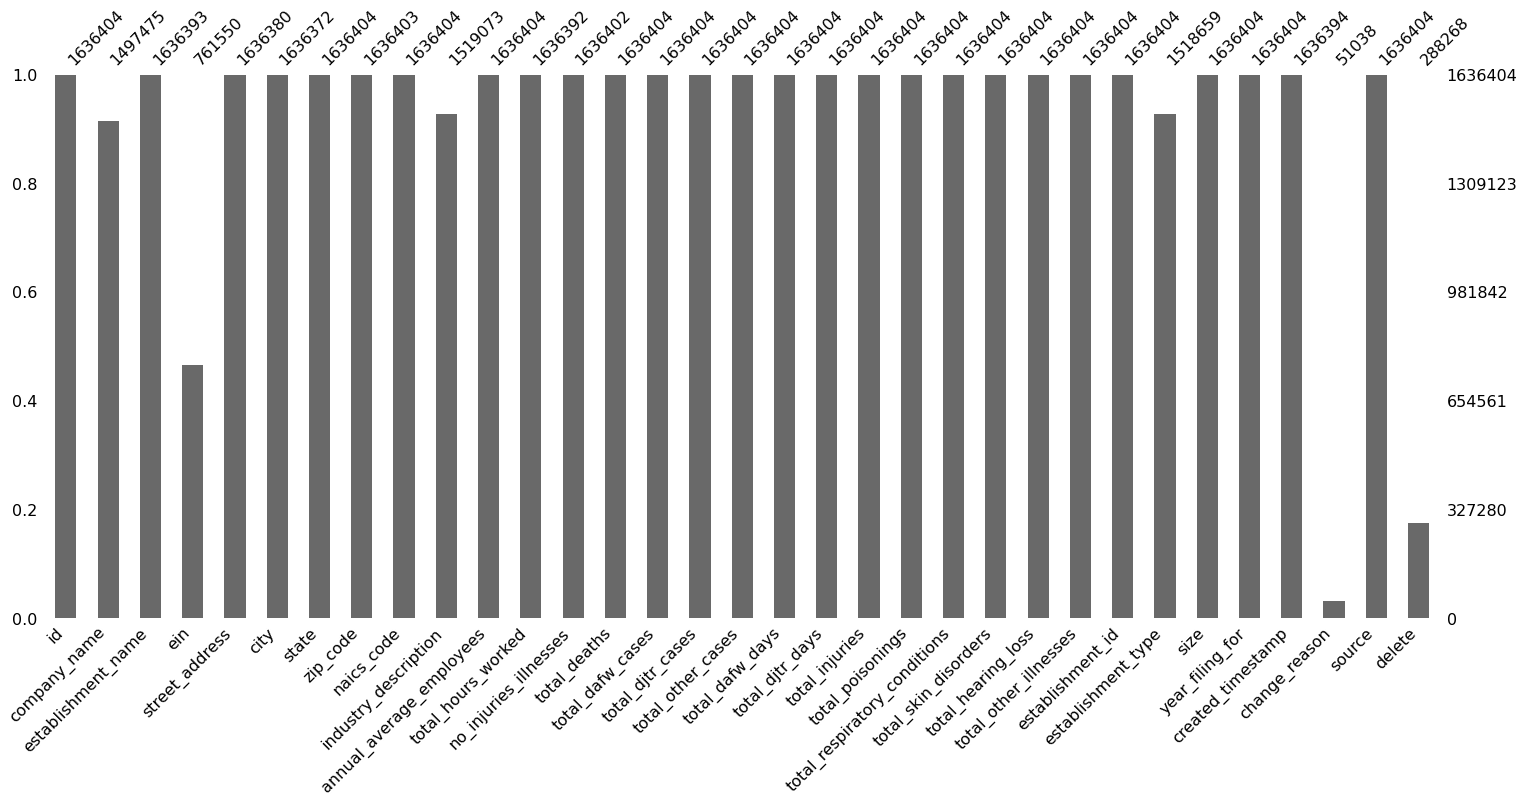

In [6]:
# visual plot of null values per column to see density of dataframe
msno.bar(osha_df_raw);

In [7]:
# Checking unique values per column
osha_df_raw.nunique()

id                              1636404
company_name                     213813
establishment_name               662874
ein                              125109
street_address                   620155
city                              42148
state                                98
zip_code                          68413
naics_code                         1733
industry_description              36951
annual_average_employees           6244
total_hours_worked               472354
no_injuries_illnesses                 2
total_deaths                         13
total_dafw_cases                    435
total_djtr_cases                    336
total_other_cases                   446
total_dafw_days                    4651
total_djtr_days                    4614
total_injuries                      667
total_poisonings                     18
total_respiratory_conditions        288
total_skin_disorders                 56
total_hearing_loss                   73
total_other_illnesses               266


In [8]:
# checking if there are full duplicated rows
# if return is true -> there are duplicates ; if false -> there are not duplicates
osha_df_raw.duplicated().any()

False

In [9]:
# as per data dictionary, column "id" must have unique number for each record
# let's confirm that there are not duplicated values within this column
osha_df_raw.id.duplicated().any()

False

In [10]:
# Summary statistics
pd.set_option('display.float_format', lambda x: '%.1f' % x) #display all float with 1 decimal

osha_df_raw.describe(include='all')

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
count,1636404.0,1497475,1636393,761550.0,1636380,1636372,1636404,1636403.0,1636404.0,1519073,1636404.0,1636392.0,1636402.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1636404.0,1518659.0,1636404.0,1636404.0,1636394,51038,1636404,288268.0
unique,NaN,213813,662874,NaN,620155,42148,98,NaN,NaN,36951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,993701,16074,6,NaN
top,NaN,USPS,Main Office,NaN,VIRTUAL,Houston,CA,NaN,NaN,Mail and Parcel Delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,11/27/2017 15:25:00,0,data\ITA Data CY 2020.csv,NaN
freq,NaN,31780,1130,NaN,11259,12765,163519,NaN,NaN,39780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166400.0,NaN,NaN,720,9464,293391,NaN
mean,844753.5,NaN,NaN,494022876.9,NaN,NaN,NaN,27474026.0,458421.5,NaN,2477.8,10705985.9,1.4,0.0,1.7,1.4,1.7,59.0,79.4,4.2,0.0,0.2,0.0,0.0,0.2,363347.7,NaN,2.0,2018.6,NaN,NaN,NaN,0.0
std,498801.2,NaN,NaN,251326729.4,NaN,NaN,NaN,133023031.0,159168.2,NaN,1374241.4,13157925568.4,0.5,0.1,8.8,7.4,8.8,1558.7,2591.2,17.1,0.1,4.3,0.4,0.6,3.7,223096.7,NaN,0.5,1.7,NaN,NaN,NaN,0.0
min,4.0,NaN,NaN,4533.0,NaN,NaN,NaN,0.0,111100.0,NaN,0.0,-4.0,1.0,0.0,0.0,0.0,-1.0,-85926.0,-173.0,-1.0,0.0,0.0,0.0,0.0,0.0,26.0,NaN,1.0,2016.0,NaN,NaN,NaN,0.0
25%,409996.8,NaN,NaN,311067245.0,NaN,NaN,NaN,29730.0,332812.0,NaN,23.0,35827.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175359.0,NaN,2.0,2017.0,NaN,NaN,NaN,0.0
50%,844110.5,NaN,NaN,460586563.5,NaN,NaN,NaN,52577.0,445110.0,NaN,48.0,81446.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,329992.0,NaN,2.0,2019.0,NaN,NaN,NaN,0.0
75%,1263524.2,NaN,NaN,710794412.0,NaN,NaN,NaN,80004.0,561320.0,NaN,115.0,197701.0,2.0,0.0,1.0,1.0,1.0,21.0,37.0,4.0,0.0,0.0,0.0,0.0,0.0,517846.2,NaN,2.0,2020.0,NaN,NaN,NaN,0.0


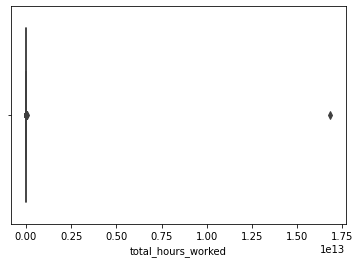

In [11]:
# box plot to see distribution of total_hours_worked
sns.boxplot(x="total_hours_worked", data=osha_df_raw);

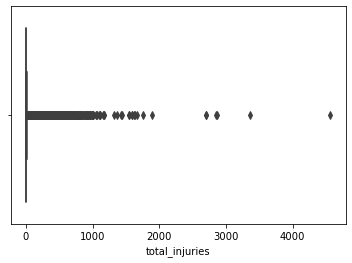

In [12]:
# box plot to see distribution of total_injuries
sns.boxplot(x="total_injuries", data=osha_df_raw);

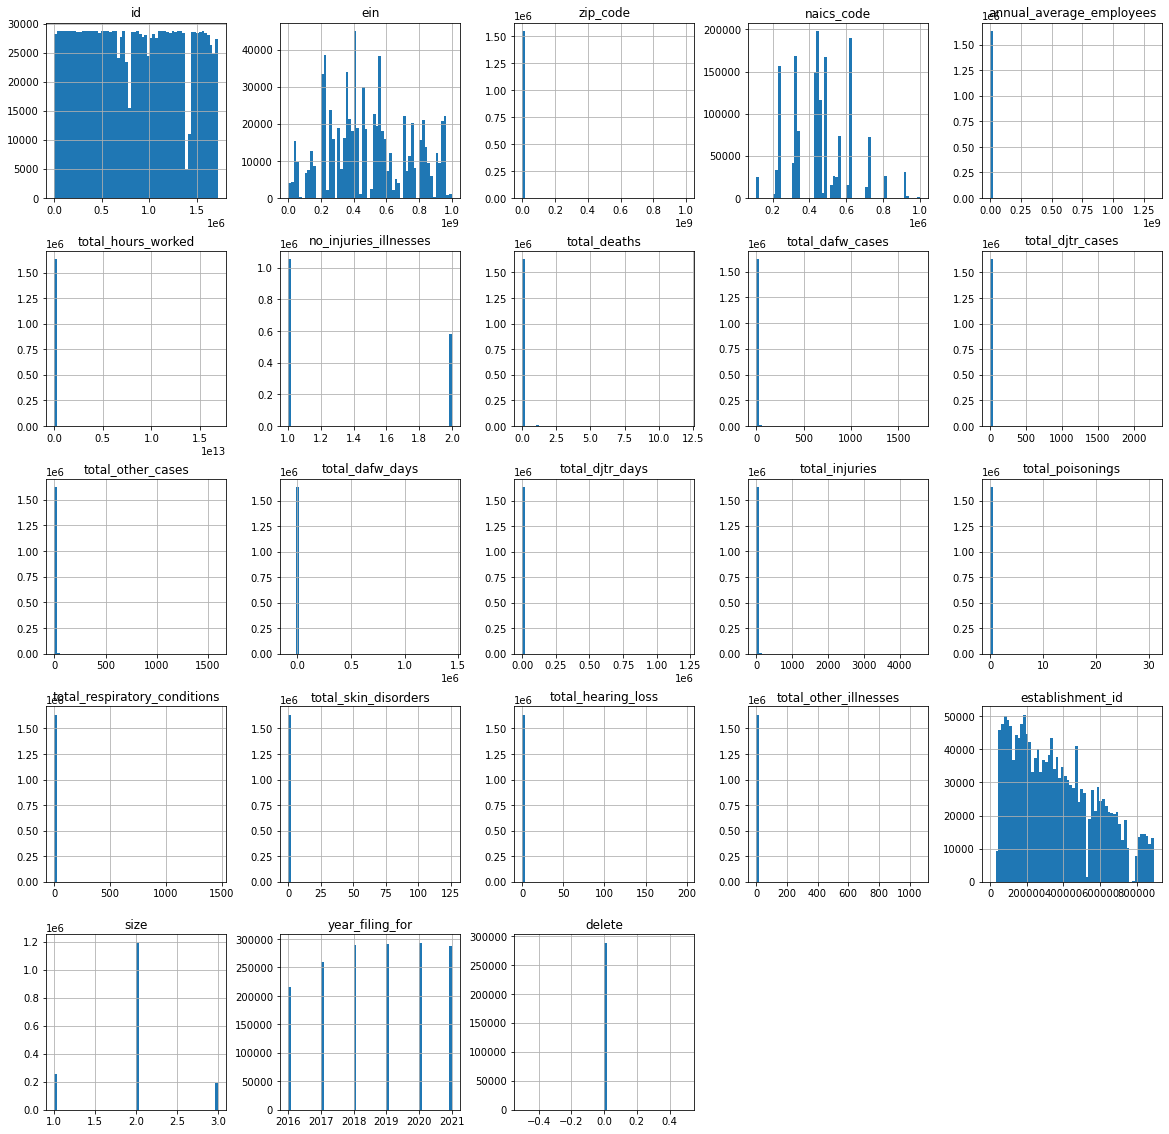

In [13]:
# raw data histogram overview
osha_df_raw.hist(figsize=(20,20),
                 bins=60,
                 xlabelsize=10,
                 ylabelsize=10
                );

Total injuries recorded: 6922092.0 


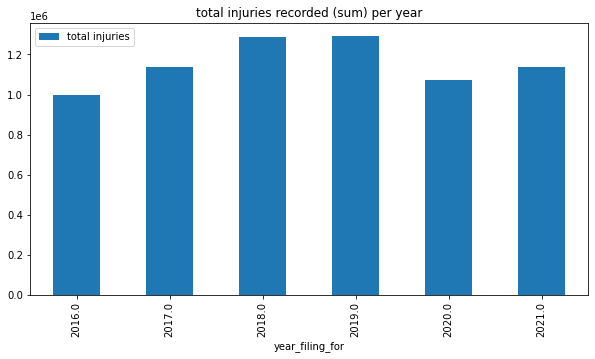

In [14]:
# preview of total injuries recorded (sum) per year
print('Total injuries recorded: {} '.format(osha_df_raw['total_injuries'].sum()))
osha_df_raw.groupby('year_filing_for')['total_injuries'].sum().plot.bar(figsize=(10,5),
    title='total injuries recorded (sum) per year')
plt.legend(["total injuries"], loc=2);

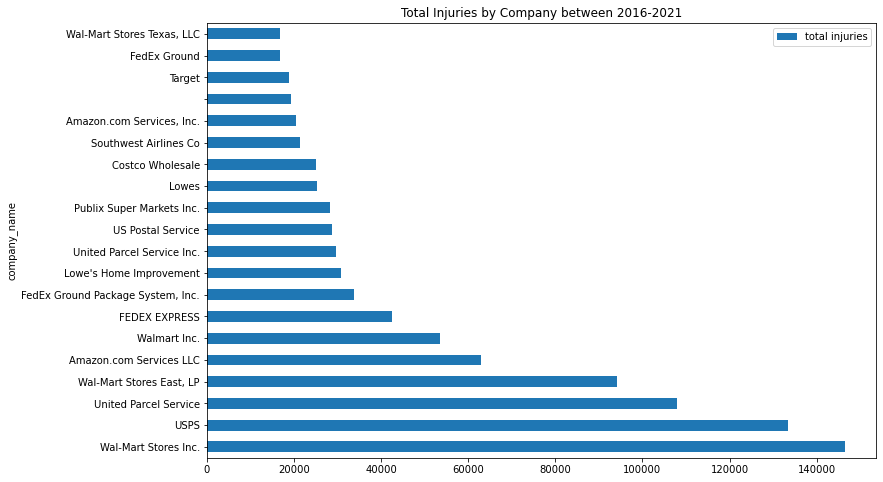

In [15]:
# preview of companies that registered highest number of total injuries: 
osha_df_raw.groupby('company_name')['total_injuries'].sum().sort_values(ascending=False).head(20).plot.barh(
    figsize=(12,8), title='Total Injuries by Company between 2016-2021')
plt.legend(['total injuries']);

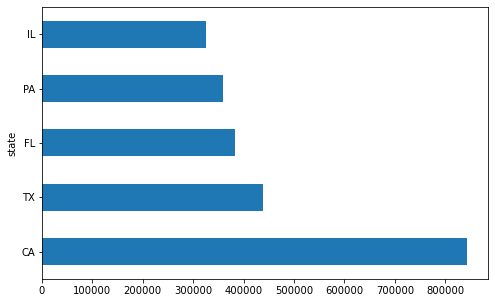

In [16]:
# preview of states that registered highest number of total injuries:
osha_df_raw.groupby('state')['total_injuries'].sum().sort_values(ascending=False).head().plot.barh(figsize=(8,5));

In [17]:
# preview of industries that registered highest number of total injuries:
osha_df_raw.groupby('industry_description')['total_injuries'].sum().sort_values(ascending=False).head()

industry_description
 General medical and surgical hospitals     244144.0
 Hospitals, general medical and surgical    200895.0
Mail and Parcel Delivery                    161996.0
General Medical and Surgical Hospitals      125190.0
General Warehousing and Storage             110519.0
Name: total_injuries, dtype: float64

## Additional data import

In [18]:
# Importing "NAICS Index File" from U.S. Census Bureau and showing preview:
naics_df = src.import_naics()

In [19]:
# Resulting dataframe:
print('NAICS Dataframe size: Number of rows = {0}; Number of Columns = {1}'.format(naics_df.shape[0], naics_df.shape[1]))

# Dataframe preview:
naics_df.head()

NAICS Dataframe size: Number of rows = 1366; Number of Columns = 2


,naics_code,naics_industry_description
0,111110,"Soybean farming, field and seed production"
1,111120,"Canola farming, field and seed production"
9,111130,"Bean farming, dry, field and seed production"
15,111140,"Wheat farming, field and seed production"
16,111150,"Corn farming (except sweet corn), field and se..."


In [20]:
# merging naics_df into osha_df to get naics_industry_description
osha_df_raw = pd.merge(osha_df_raw, naics_df, on='naics_code', how='left')

## Data Cleaning & Formatting

Data wrangling is an important step in any data science project, since it removes the risk by ensuring data is in a reliable state before it is analyzed and leveraged, making it to be a critical part of the analytical process.

From the previous steps, it can be seen that despite dataset quality is good, the data still needs to be processed and formatted.

Thus, in this section we will:
* Clean the data: keep columns that are meaningful for our analysis and remove outliers with reference to interquartile range
* Format the data: such as data conversion, remove negative numeric values, filling empty values, removing special characters, standardize company name, etc.

This will be possible by the use of a following single function `df_clean_format`, which will be executed through ****kwargs parameter**, allowing to accept a variable number of keyword arguments as a dictionary.

In [21]:
# Function Parameters
clean_format_param = dict(
    df = osha_df_raw,
    columns_drop = [
        "ein",
        "street_address",
        "city",
        "zip_code",
        "annual_average_employees",
        "total_poisonings",
        "total_respiratory_conditions",
        "total_skin_disorders",
        "total_hearing_loss",
        "total_other_illnesses",
        "establishment_id",        
        "establishment_type",
        "created_timestamp",
        "change_reason",
        "source",
        "delete"
    ],
    outlier_column_list = [
        "total_hours_worked", 
        "total_injuries"
    ],
    float_columns = [
        "id",
        "naics_code",
        "total_deaths",
        "total_dafw_cases",
        "total_djtr_cases",
        "total_other_cases",
        "total_dafw_days",
        "total_djtr_days",
        "total_injuries",
        "size"],
    injury_number = "no_injuries_illnesses",
    size_column = "size",
    year_column = "year_filing_for",
    company_column = "company_name",
    establishment_column = "establishment_name",
    industry_raw = "industry_description",
    industry_clean = "naics_industry_description"    
)

# Executing cleaning & formatting function
src.df_clean_format(**clean_format_param)

In [22]:
# Recalculating total_injuries:
osha_df_raw.total_injuries = osha_df_raw.total_dafw_cases + osha_df_raw.total_djtr_cases + osha_df_raw.total_other_cases

In [23]:
osha_df_raw.describe()

,id,naics_code,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,year_filing_for
count,1353321.0,1353321.0,1353315.0,1353321.0,1353321.0,1353321.0,1353321.0,1353321.0,1353321.0,1353321.0,1353321.0
mean,851266.4,458166.5,91285.2,0.0,0.7,0.5,0.6,21.4,27.8,1.7,2018.7
std,497691.8,159408.7,87237.9,0.0,1.9,1.0,1.2,386.3,1109.4,2.7,1.7
min,7.0,111100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0
25%,416461.0,332813.0,29000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0
50%,853497.0,445110.0,62400.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0
75%,1268880.0,561320.0,126266.0,0.0,1.0,1.0,1.0,5.0,11.0,3.0,2020.0
max,1724286.0,999999.0,440512.0,12.0,152.0,25.0,143.0,327697.0,373871.0,153.0,2021.0


## Calculating Incident Rate

As explained in section 2.1. Rate Calculation, we will now calculate the incident rates as follows:

**TCR** = Total recordable cases of injuries and illnesses

**DART** = Serious recordable cases of injuries and illnesses with days away from work, job transfer, or restriction.

(Number of injuries and illnesses x 200,000) / Employee hours worked

In [24]:
osha_df_raw["TCR"] = osha_df_raw.total_injuries*200000 / osha_df_raw.total_hours_worked
osha_df_raw["TCR"] = osha_df_raw["TCR"].replace([np.inf, -np.inf, np.nan], 0)

In [25]:
osha_df_raw["DART"] = (osha_df_raw.total_dafw_cases + osha_df_raw.total_djtr_cases)*200000 / osha_df_raw.total_hours_worked
osha_df_raw["DART"] = osha_df_raw["DART"].replace([np.inf, -np.inf, np.nan], 0)

In [26]:
# removing outliers from TCR:
src.drop_outlier_rate(osha_df_raw, "TCR")

In [27]:
# Checking resulting df null values per column
# we can see that our current df has almost no missing values
osha_df_raw.isnull().sum()

id                               0
company_name                     0
establishment_name              10
state                            0
naics_code                       0
total_hours_worked               6
injury_illness                   1
total_deaths                     0
total_dafw_cases                 0
total_djtr_cases                 0
total_other_cases                0
total_dafw_days                  0
total_djtr_days                  0
total_injuries                   0
size                             0
year_filing_for                  0
naics_industry_description    3216
TCR                              0
DART                             0
dtype: int64

In [28]:
# Resulting dataframe preview
print('Processed Dataframe size: Number of rows = {0}; Number of Columns = {1}'.format(osha_df_raw.shape[0], osha_df_raw.shape[1]))

osha_df_raw.head()

Processed Dataframe size: Number of rows = 1347307; Number of Columns = 19


,id,company_name,establishment_name,state,naics_code,total_hours_worked,injury_illness,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,size,year_filing_for,naics_industry_description,TCR,DART
3,7,The Talaria Company,"Morris Yachts, LLC",ME,336612,75794.0,yes,0,0,1,0,0,49,1,20-249,2016,Air boat building,2.6,2.6
4,8,The Talaria Company,"Hunt Yachts, LLC",RI,336612,114734.0,yes,0,3,0,3,92,0,6,20-249,2016,Air boat building,10.5,5.2
5,9,Mohawk Bridge Iron,"Mohawk Bridge & Iron, Inc.",MD,238120,135507.0,no,0,0,0,0,0,0,0,20-249,2016,"Balcony, precast concrete, installation",0.0,0.0
6,10,Huxford Pole Timber Company,"Huxford Pole & Timber Company, Inc.",AL,321114,65092.0,yes,0,1,0,0,2,0,1,20-249,2016,"Bridge and trestle parts, wood, treating",3.1,3.1
7,11,Sc Transport,Transportation,MI,484220,118149.0,yes,0,2,0,0,105,112,2,20-249,2016,"Agricultural products trucking, local",3.4,3.4


In [29]:
# Resulting dataframe summary statistics
osha_df_raw.describe()

,id,naics_code,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,year_filing_for,TCR,DART
count,1347307.0,1347307.0,1347301.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0,1347307.0
mean,851162.8,457886.5,91657.6,0.0,0.7,0.4,0.6,21.3,27.9,1.7,2018.7,4.2,2.7
std,497674.5,159250.9,87241.1,0.0,1.8,1.0,1.1,383.0,1111.9,2.6,1.7,6.6,5.2
min,7.0,111100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,0.0,0.0
25%,416440.5,332812.0,29390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,0.0,0.0
50%,853408.0,445110.0,62621.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,2.1,0.0
75%,1268721.5,561210.0,126727.0,0.0,1.0,1.0,1.0,5.0,11.0,3.0,2020.0,5.8,3.6
max,1724286.0,999999.0,440512.0,9.0,104.0,25.0,84.0,327697.0,373871.0,105.0,2021.0,69.5,69.4


## Clean Data Result

In [30]:
osha_df_clean = osha_df_raw.copy(deep=False)

In [31]:
# To export dataset:
#osha_df_clean.to_csv("output/osha_df_clean.csv", index=False)

In [32]:
# To finish this notebook, we will pickle the output osha_df_clean
filename = 'clean_data'
outfile = open(filename,'wb')
pickle.dump(osha_df_clean, outfile)
outfile.close()